#                                  Multi Label Clasification - 3D

# Load Data

In [1]:
import pandas as pd
import os

In [2]:

file_name = "diabetes_dataset"
root_folder = f'multi-label-clasification/two-d/{file_name}/' 
os.makedirs(root_folder, exist_ok=True)

df = pd.read_csv('sample_data/'+file_name+'.csv')

#buang kolom tidak dibutuhkan
df.drop(columns=['diagnosed_diabetes'], inplace=True)

print("Sebulum DROP nan : " + str(df.shape) )
df = df.dropna() #Drop Nan
print("Setelah DROP nan : " + str(df.shape) )

Sebulum DROP nan : (100000, 30)
Setelah DROP nan : (100000, 30)


In [3]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  cholesterol_total  \
0                                 215         5.7  ...                239   
1                                 143         6.7  ...                116   
2                                  57         6.4  ...                213   
3                                  49         3.4  ...                171   
4                                 109         7.2  ...                210   

   hdl_cholesterol  ldl_cholesterol  triglycerides  glucose_fasting  \
0               41              160            145              136   
1               55               50             30               93   
2               66               99             36              118   
3               50               79            140              139   
4               52              125            160              137   

   glucose_postprandial  insulin_level  hba1c  diabetes_risk_score  \
0                   236           6.36   8.18                 29.6   
1                   150           2.00   5.63                 23.0   
2                   195           5.07   7.51                 44.7   
3                   253           5.28   9.03                 38.2   
4                   184          12.74   7.20                 23.5   

   diabetes_stage  
0          Type 2  
1     No Diabetes  
2          Type 2  
3          Type 2  
4          Type 2  

[5 rows x 30 columns]

#### LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#labeling
df['label_gender']            = le.fit_transform(df['gender'])
df['label_ethnicity']         = le.fit_transform(df['ethnicity'])
df['label_income_level']      = le.fit_transform(df['income_level'])
df['label_education_level']   = le.fit_transform(df['education_level'])
df['label_employment_status'] = le.fit_transform(df['employment_status'])
df['label_smoking_status']    = le.fit_transform(df['smoking_status'])

In [5]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  insulin_level  hba1c  \
0                                 215         5.7  ...           6.36   8.18   
1                                 143         6.7  ...           2.00   5.63   
2                                  57         6.4  ...           5.07   7.51   
3                                  49         3.4  ...           5.28   9.03   
4                                 109         7.2  ...          12.74   7.20   

   diabetes_risk_score  diabetes_stage  label_gender  label_ethnicity  \
0                 29.6          Type 2             1                0   
1                 23.0     No Diabetes             0                4   
2                 44.7          Type 2             1                2   
3                 38.2          Type 2             0                1   
4                 23.5          Type 2             1                4   

   label_income_level  label_education_level  label_employment_status  \
0                   2                      1                        0   
1                   3                      1                        0   
2                   3                      1                        3   
3                   1                      1                        1   
4                   3                      0                        1   

   label_smoking_status  
0                     2  
1                     1  
2                     2  
3                     2  
4                     2  

[5 rows x 36 columns]

#### Scaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Contoh: buat dan fit scaler
scaler = MinMaxScaler()
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score'
]

# Dictionary untuk menyimpan hasil transformasi
scaled_data = {}

# Loop untuk setiap kolom
for col in cols:
    scaler = MinMaxScaler()
    df[[col]] = scaler.fit_transform(df[[col]])  # scaling per kolom
    joblib.dump(scaler, os.path.join(root_folder, f'scaler_{col}.pkl'))
    scaled_data[col] = scaler
    print(f"‚úÖ Scaler for '{col}' saved as scaler_{col}.pkl")

print("\nAll individual scalers saved successfully!")

‚úÖ Scaler for 'label_gender' saved as scaler_label_gender.pkl
‚úÖ Scaler for 'label_ethnicity' saved as scaler_label_ethnicity.pkl
‚úÖ Scaler for 'label_income_level' saved as scaler_label_income_level.pkl
‚úÖ Scaler for 'label_education_level' saved as scaler_label_education_level.pkl
‚úÖ Scaler for 'label_employment_status' saved as scaler_label_employment_status.pkl
‚úÖ Scaler for 'label_smoking_status' saved as scaler_label_smoking_status.pkl
‚úÖ Scaler for 'age' saved as scaler_age.pkl
‚úÖ Scaler for 'physical_activity_minutes_per_week' saved as scaler_physical_activity_minutes_per_week.pkl
‚úÖ Scaler for 'diet_score' saved as scaler_diet_score.pkl
‚úÖ Scaler for 'sleep_hours_per_day' saved as scaler_sleep_hours_per_day.pkl
‚úÖ Scaler for 'glucose_postprandial' saved as scaler_glucose_postprandial.pkl
‚úÖ Scaler for 'insulin_level' saved as scaler_insulin_level.pkl
‚úÖ Scaler for 'hba1c' saved as scaler_hba1c.pkl
‚úÖ Scaler for 'diabetes_risk_score' saved as scaler_diabetes_risk_

In [7]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0  0.555556    Male     Asian      Highschool  Lower-Middle          Employed   
1  0.416667  Female     White      Highschool        Middle          Employed   
2  0.583333    Male  Hispanic      Highschool        Middle        Unemployed   
3  0.777778  Female     Black      Highschool           Low           Retired   
4  0.388889    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  insulin_level  \
0                            0.258103        0.57  ...       0.144275   
1                            0.171669        0.67  ...       0.000000   
2                            0.068427        0.64  ...       0.101588   
3                            0.058824        0.34  ...       0.108537   
4                            0.130852        0.72  ...       0.355394   

      hba1c  diabetes_risk_score  diabetes_stage  label_gender  \
0  0.720690             0.417054          Type 2           0.5   
1  0.281034             0.314729     No Diabetes           0.0   
2  0.605172             0.651163          Type 2           0.5   
3  0.867241             0.550388          Type 2           0.0   
4  0.551724             0.322481          Type 2           0.5   

   label_ethnicity  label_income_level  label_education_level  \
0             0.00                0.50               0.333333   
1             1.00                0.75               0.333333   
2             0.50                0.75               0.333333   
3             0.25                0.25               0.333333   
4             1.00                0.75               0.000000   

   label_employment_status  label_smoking_status  
0                 0.000000                   1.0  
1                 0.000000                   0.5  
2                 1.000000                   1.0  
3                 0.333333                   1.0  
4                 0.333333                   1.0  

[5 rows x 36 columns]

#### Mapping label

In [8]:
import json
mapping_dicts = {}

cols = [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'employment_status',
    'smoking_status'
]

for col in cols:
    label_col = f"label_{col}"
    mapping_dicts[col] = dict(zip(df[col], df[label_col]))


with open(root_folder + 'label_mappings.json', 'w') as f:
    json.dump(mapping_dicts, f, indent=2)

rows = []
for col, mapping in mapping_dicts.items():
    for k, v in mapping.items():
        rows.append({'feature': col, 'original_value': k, 'label_value': v})

mapping_table = pd.DataFrame(rows)
print(mapping_table)

              feature original_value  label_value
0              gender           Male     0.500000
1              gender         Female     0.000000
2              gender          Other     1.000000
3           ethnicity          Asian     0.000000
4           ethnicity          White     1.000000
5           ethnicity       Hispanic     0.500000
6           ethnicity          Black     0.250000
7           ethnicity          Other     0.750000
8     education_level     Highschool     0.333333
9     education_level       Graduate     0.000000
10    education_level   Postgraduate     1.000000
11    education_level      No formal     0.666667
12       income_level   Lower-Middle     0.500000
13       income_level         Middle     0.750000
14       income_level            Low     0.250000
15       income_level   Upper-Middle     1.000000
16       income_level           High     0.000000
17  employment_status       Employed     0.000000
18  employment_status     Unemployed     1.000000


#### Select Kolom To Trian

In [9]:
col_target = 'diabetes_stage'
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score',
    #------------------------
    col_target
]
df = df[cols].copy()

In [10]:
df.head()

label_gender  label_ethnicity  label_income_level  label_education_level  \
0           0.5             0.00                0.50               0.333333   
1           0.0             1.00                0.75               0.333333   
2           0.5             0.50                0.75               0.333333   
3           0.0             0.25                0.25               0.333333   
4           0.5             1.00                0.75               0.000000   

   label_employment_status  label_smoking_status       age  \
0                 0.000000                   1.0  0.555556   
1                 0.000000                   0.5  0.416667   
2                 1.000000                   1.0  0.583333   
3                 0.333333                   1.0  0.777778   
4                 0.333333                   1.0  0.388889   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                            0.258103        0.57             0.700000   
1                            0.171669        0.67             0.500000   
2                            0.068427        0.64             1.000000   
3                            0.058824        0.34             0.514286   
4                            0.130852        0.72             0.628571   

   glucose_postprandial  insulin_level     hba1c  diabetes_risk_score  \
0              0.764977       0.144275  0.720690             0.417054   
1              0.368664       0.000000  0.281034             0.314729   
2              0.576037       0.101588  0.605172             0.651163   
3              0.843318       0.108537  0.867241             0.550388   
4              0.525346       0.355394  0.551724             0.322481   

  diabetes_stage  
0         Type 2  
1    No Diabetes  
2         Type 2  
3         Type 2  
4         Type 2

#### cek keseimbangan data

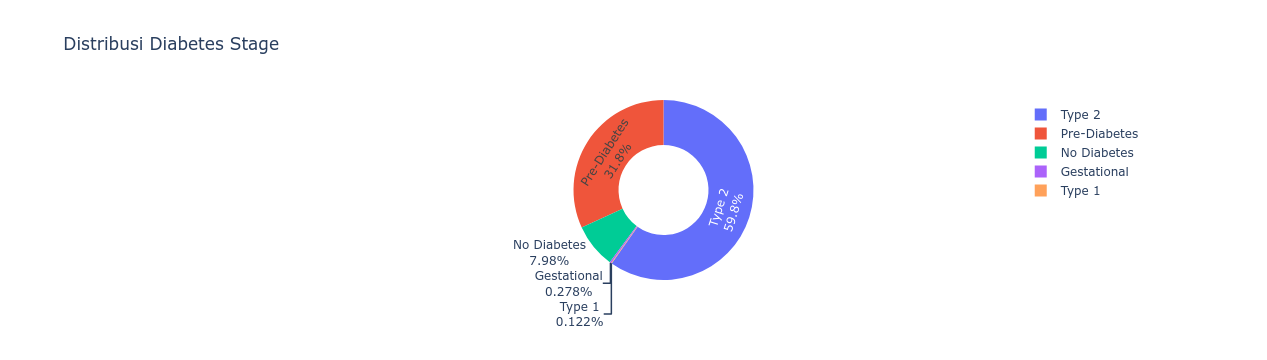

In [11]:
import plotly.express as px

fig = px.pie(
    df,
    names=col_target,
    hole=0.5,  # membuatnya jadi donat
    title='Distribusi Diabetes Stage',
)
fig.update_traces(textinfo='percent+label')
fig.show()

#### Tentukan target -> one-hot encoding

In [12]:
y_counts = df[col_target].value_counts(normalize=True)
labels = list(y_counts.index)

df_y_encoded = pd.get_dummies(df[col_target], prefix='y')

# Pastikan semua nama kolom lowercase dan spasi ‚Üí underscore
df_y_encoded.columns = (
    df_y_encoded.columns.str.lower()
                        .str.replace(' ', '_')
)

# Gabungkan ke DataFrame utama
df = pd.concat([df.drop(col_target, axis=1), df_y_encoded.astype(int)], axis=1)

In [13]:
df.head()

label_gender  label_ethnicity  label_income_level  label_education_level  \
0           0.5             0.00                0.50               0.333333   
1           0.0             1.00                0.75               0.333333   
2           0.5             0.50                0.75               0.333333   
3           0.0             0.25                0.25               0.333333   
4           0.5             1.00                0.75               0.000000   

   label_employment_status  label_smoking_status       age  \
0                 0.000000                   1.0  0.555556   
1                 0.000000                   0.5  0.416667   
2                 1.000000                   1.0  0.583333   
3                 0.333333                   1.0  0.777778   
4                 0.333333                   1.0  0.388889   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                            0.258103        0.57             0.700000   
1                            0.171669        0.67             0.500000   
2                            0.068427        0.64             1.000000   
3                            0.058824        0.34             0.514286   
4                            0.130852        0.72             0.628571   

   glucose_postprandial  insulin_level     hba1c  diabetes_risk_score  \
0              0.764977       0.144275  0.720690             0.417054   
1              0.368664       0.000000  0.281034             0.314729   
2              0.576037       0.101588  0.605172             0.651163   
3              0.843318       0.108537  0.867241             0.550388   
4              0.525346       0.355394  0.551724             0.322481   

   y_gestational  y_no_diabetes  y_pre-diabetes  y_type_1  y_type_2  
0              0              0               0         0         1  
1              0              1               0         0         0  
2              0              0               0         0         1  
3              0              0               0         0         1  
4              0              0               0         0         1

# Data Load To Train

#### Split data

In [14]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Misal df sudah berisi semua data
# Pisahkan fitur dan target
feature_1_cols = ['label_gender','label_smoking_status']
feature_2_cols = ['age','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day']
feature_3_cols = ['glucose_postprandial','insulin_level','hba1c',]

target_cols = [col for col in df.columns if col.startswith('y_')]

# Pisahkan train-test (stratify opsional jika masih punya kolom 'diabetes_stage')
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)


#### DataLoader

In [15]:
from data_set import MultiLabel3DDataset

# Buat dataset dengan class kamu
train_dataset = MultiLabel3DDataset(X_train, feature_1_cols,feature_2_cols,feature_3_cols, target_cols, normalize=False)
test_dataset  = MultiLabel3DDataset(X_test, feature_1_cols,feature_2_cols,feature_3_cols, target_cols, normalize=False)

# Buat DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Cek contoh batch
for X1,X2,X3, y in train_loader:
    print("X1 shape:", X1.shape)
    print("X2 shape:", X2.shape)
    print("X3 shape:", X3.shape)
    print("y shape:", y.shape)
    print(X1[:3])  # contoh fitur
    print(X2[:3])  # contoh fitur
    print(X3[:3])  # contoh fitur
    print(y[:3])  # contoh label
    break

X1 shape: torch.Size([32, 2])
X2 shape: torch.Size([32, 4])
X3 shape: torch.Size([32, 3])
y shape: torch.Size([32, 5])
tensor([[0.5000, 1.0000],
        [0.0000, 1.0000],
        [0.5000, 1.0000]])
tensor([[0.0139, 0.0648, 0.6200, 0.7857],
        [0.5417, 0.0984, 0.3100, 0.6000],
        [0.4861, 0.1777, 0.6000, 0.6000]])
tensor([[0.5576, 0.2713, 0.5328],
        [0.4654, 0.5735, 0.4948],
        [0.5300, 0.2151, 0.5224]])
tensor([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])


# Config

In [40]:
from jcopdl.callback import Callback, set_config

config = set_config({
    "labels"         : labels,
    "threshold"      : 0.5,
    "feature_1_cols" : feature_1_cols,
    "feature_2_cols" : feature_2_cols,
    "feature_3_cols" : feature_3_cols,
    "input_1_dim"    : len(test_dataset.X1[0]),
    "input_2_dim"    : len(test_dataset.X2[0]),
    "input_3_dim"    : len(test_dataset.X3[0]),
    "hidden_1_dims"  : [ 1],
    "hidden_2_dims"  : [ 5,2],
    "hidden_3_dims"  : [ 4,2],
    "combine_dims"   : [4],
    "output_dim"     : len(labels),
    "dropout"        : 0.1,
    "activation"     : "relu",
    "early_stop_patience" : 3,
    "col_target"     : col_target,
})
config

Config(activation=relu, col_target=diabetes_stage, combine_dims=[4], dropout=0.1, early_stop_patience=3, feature_1_cols=['label_gender', 'label_smoking_status'], feature_2_cols=['age', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day'], feature_3_cols=['glucose_postprandial', 'insulin_level', 'hba1c'], hidden_1_dims=[1], hidden_2_dims=[5, 2], hidden_3_dims=[4, 2], input_1_dim=2, input_2_dim=4, input_3_dim=3, labels=['Type 2', 'Pre-Diabetes', 'No Diabetes', 'Gestational', 'Type 1'], output_dim=5, threshold=0.5)

# MCOC

#### Model - Criterion - Optimizer - Callback

In [41]:
from class_lib import MultiLabel3DClassifier
from torch import optim, nn
from jcopdl.callback import Callback

#Model
model = MultiLabel3DClassifier(
    input_dim_1  = config.input_1_dim, 
    input_dim_2  = config.input_2_dim, 
    input_dim_3  = config.input_3_dim, 
    hidden_dims_1= config.hidden_1_dims,
    hidden_dims_2= config.hidden_2_dims,
    hidden_dims_3= config.hidden_3_dims,
    combined_dims= config.combine_dims,
    output_dim   = config.output_dim,
    dropout=config.dropout, 
    activation=config.activation
).to(device)

#Criterion
criterion = nn.BCELoss()

#Optimizer
optim = optim.AdamW(model.parameters(), lr=0.001)

#Callback
callback = Callback(model, config, outdir=root_folder,early_stop_patience=config.early_stop_patience)

#### Visualisasi Model

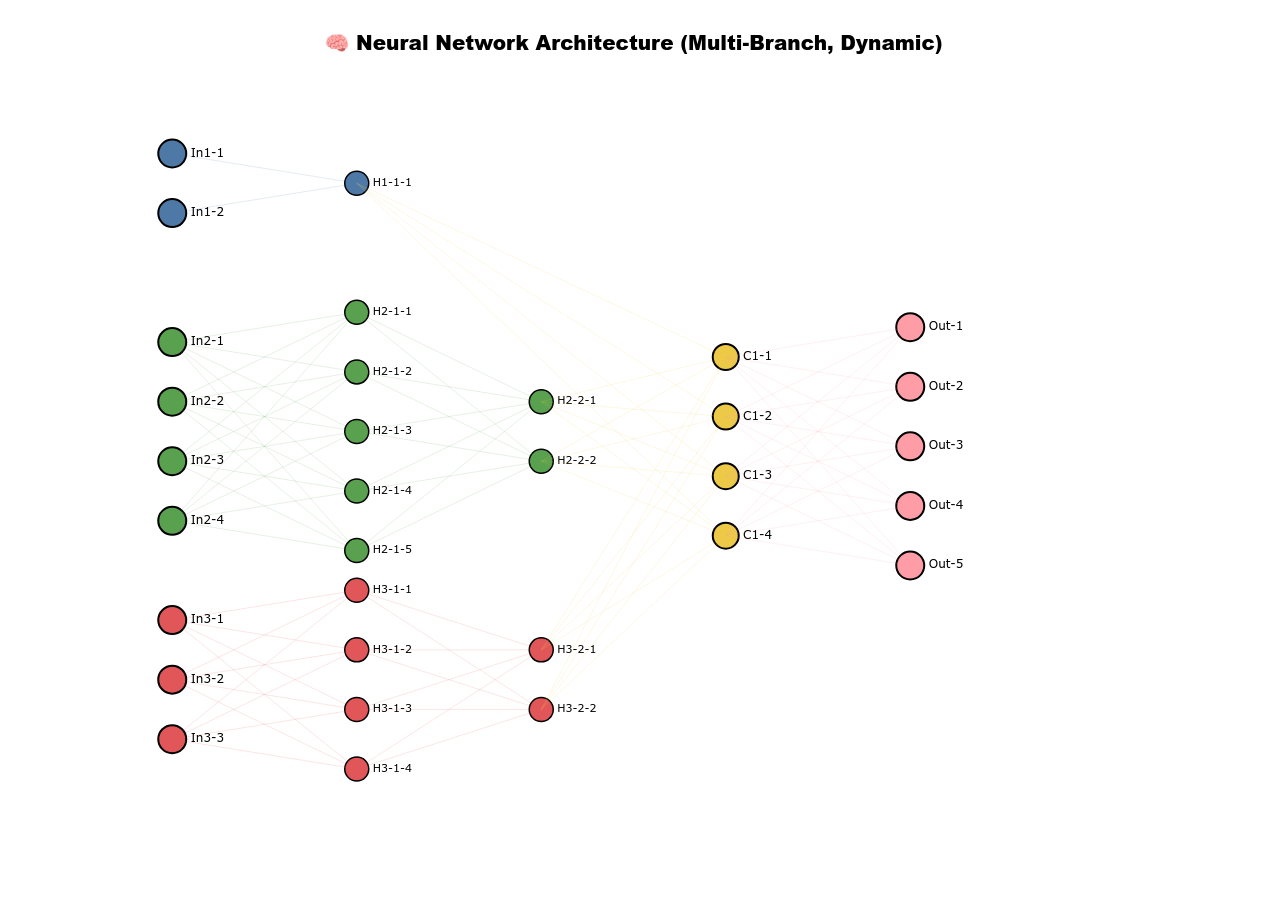

In [42]:
from visualization import plot_dynamic_multi_input_network
plot_dynamic_multi_input_network(
    input_dims=[config.input_1_dim, config.input_2_dim,config.input_3_dim],
    hidden_dims_per_branch=[
        config.hidden_1_dims,
        config.hidden_2_dims,
        config.hidden_3_dims
    ],
    combined_dims=config.combine_dims,
    output_dim=config.output_dim,
    figsize=(1000, 900)
)


# Training


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 1 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1982.62it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.3200 ‚îÇ 0.2210 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.1651 ‚îÇ 0.1134 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.5011 ‚îÇ 0.5257 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.6761  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.5487 ‚îÇ 0.6498 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.1462 ‚îÇ 0.1735 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.8393  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.8349 ‚îÇ 0.8867 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     1
Train_cost  = 0.3200 | Test_cost  = 0.2210 | Train_score = 0.8349 | Test_score = 0.8867 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 2 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1953.82it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.2204 ‚îÇ 0.1855 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.1074 ‚îÇ 0.0839 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.6464 ‚îÇ 0.7753 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.7861  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.7067 ‚îÇ 0.7870 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.2816 ‚îÇ 0.3212 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.8763  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.8926 ‚îÇ 0.9161 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     2
Train_cost  = 0.2204 | Test_cost  = 0.1855 | Train_score = 0.8926 | Test_score = 0.9161 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 3 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1959.00it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.2043 ‚îÇ 0.1813 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0941 ‚îÇ 0.0801 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7237 ‚îÇ 0.7765 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.7965  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.7547 ‚îÇ 0.7949 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3079 ‚îÇ 0.3259 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.8850  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9059 ‚îÇ 0.9199 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     3
Train_cost  = 0.2043 | Test_cost  = 0.1813 | Train_score = 0.9059 | Test_score = 0.9199 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 4 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1983.66it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1983 ‚îÇ 0.1806 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0897 ‚îÇ 0.0766 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7433 ‚îÇ 0.8009 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8095  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.7681 ‚îÇ 0.8070 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3143 ‚îÇ 0.3320 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.8895  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9103 ‚îÇ 0.9234 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     4
Train_cost  = 0.1983 | Test_cost  = 0.1806 | Train_score = 0.9103 | Test_score = 0.9234 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 5 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1945.68it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1945 ‚îÇ 0.1775 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0866 ‚îÇ 0.0743 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7601 ‚îÇ 0.8083 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8172  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.7782 ‚îÇ 0.8130 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3193 ‚îÇ 0.3353 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.8931  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9134 ‚îÇ 0.9256 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     5
Train_cost  = 0.1945 | Test_cost  = 0.1775 | Train_score = 0.9134 | Test_score = 0.9256 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 6 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1994.41it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1887 ‚îÇ 0.1765 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0833 ‚îÇ 0.0728 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7773 ‚îÇ 0.8137 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8199  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.7887 ‚îÇ 0.8171 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3245 ‚îÇ 0.3369 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.8980  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9167 ‚îÇ 0.9272 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     6
Train_cost  = 0.1887 | Test_cost  = 0.1765 | Train_score = 0.9167 | Test_score = 0.9272 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 7 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1945.79it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1904 ‚îÇ 0.1769 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0817 ‚îÇ 0.0716 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7847 ‚îÇ 0.8172 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8224  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.7935 ‚îÇ 0.8203 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3269 ‚îÇ 0.3382 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.9018  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9183 ‚îÇ 0.9284 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     7
Train_cost  = 0.1904 | Test_cost  = 0.1769 | Train_score = 0.9183 | Test_score = 0.9284 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 8 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1888.98it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1893 ‚îÇ 0.1740 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0800 ‚îÇ 0.0703 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7914 ‚îÇ 0.8218 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8259  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.7983 ‚îÇ 0.8238 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3290 ‚îÇ 0.3398 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.9046  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9200 ‚îÇ 0.9297 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     8
Train_cost  = 0.1893 | Test_cost  = 0.1740 | Train_score = 0.9200 | Test_score = 0.9297 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 9 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1999.40it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1874 ‚îÇ 0.1757 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0789 ‚îÇ 0.0708 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7953 ‚îÇ 0.8207 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8269  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.8014 ‚îÇ 0.8226 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3304 ‚îÇ 0.3397 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.9011  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9212 ‚îÇ 0.9292 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch     9
Train_cost  = 0.1874 | Test_cost  = 0.1757 | Train_score = 0.9212 | Test_score = 0.9292 |
==> EarlyStop patience =  1 | Best test_score: 0.9297


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 10 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1940.05it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1903 ‚îÇ 0.1730 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0785 ‚îÇ 0.0696 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7970 ‚îÇ 0.8242 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8296  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.8025 ‚îÇ 0.8257 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3309 ‚îÇ 0.3409 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.9045  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9215 ‚îÇ 0.9304 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch    10
Train_cost  = 0.1903 | Test_cost  = 0.1730 | Train_score = 0.9215 | Test_score = 0.9304 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 11 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1977.84it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1880 ‚îÇ 0.1736 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0780 ‚îÇ 0.0692 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.7990 ‚îÇ 0.8249 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8280  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.8038 ‚îÇ 0.8266 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3316 ‚îÇ 0.3410 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.9079  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9220 ‚îÇ 0.9308 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch    11
Train_cost  = 0.1880 | Test_cost  = 0.1736 | Train_score = 0.9220 | Test_score = 0.9308 |


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 12 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1921.23it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1884 ‚îÇ 0.1715 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0773 ‚îÇ 0.0695 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.8019 ‚îÇ 0.8255 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8278  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.8060 ‚îÇ 0.8262 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3325 ‚îÇ 0.3408 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.9070  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9227 ‚îÇ 0.9305 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch    12
Train_cost  = 0.1884 | Test_cost  = 0.1715 | Train_score = 0.9227 | Test_score = 0.9305 |
==> EarlyStop patience =  1 | Best test_score: 0.9308


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 13 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1967.59it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1863 ‚îÇ 0.1722 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0769 ‚îÇ 0.0714 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.8035 ‚îÇ 0.8192 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8219  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.8072 ‚îÇ 0.8210 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3331 ‚îÇ 0.3382 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.9031  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9232 ‚îÇ 0.9286 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch    13
Train_cost  = 0.1863 | Test_cost  = 0.1722 | Train_score = 0.9232 | Test_score = 0.9286 |
==> EarlyStop patience =  2 | Best test_score: 0.9308


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üöÄ EPOCH 14 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 625/625 [00:00<00:00, 1958.94it/s]


              üìä Summary                  üéØ Per-Label Accuracy   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metric           ‚îÉ  Train ‚îÉ   Test ‚îÉ ‚îÉ    Label     ‚îÉ Accuracy ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Loss             ‚îÇ 0.1876 ‚îÇ 0.1741 ‚îÇ ‚îÇ    Type 2    ‚îÇ  0.9971  ‚îÇ
‚îÇ Hamming Loss     ‚îÇ 0.0771 ‚îÇ 0.0714 ‚îÇ ‚îÇ Pre-Diabetes ‚îÇ  0.9220  ‚îÇ
‚îÇ Subset Accuracy  ‚îÇ 0.8032 ‚îÇ 0.8203 ‚îÇ ‚îÇ No Diabetes  ‚îÇ  0.8245  ‚îÇ
‚îÇ Micro F1         ‚îÇ 0.8067 ‚îÇ 0.8212 ‚îÇ ‚îÇ Gestational  ‚îÇ  0.9988  ‚îÇ
‚îÇ Macro F1         ‚îÇ 0.3329 ‚îÇ 0.3392 ‚îÇ ‚îÇ    Type 1    ‚îÇ  0.9005  ‚îÇ
‚îÇ Overall Accuracy ‚îÇ 0.9229 ‚îÇ 0.9286 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


Epoch    14
Train_cost  = 0.1876 | Test_cost  = 0.1741 | Train_score = 0.9229 | Test_score = 0.9286 |
==> EarlyStop patience =  3 | Best test_score: 0.9308
==> Execute Early Stopping at epoch: 14 | Best test_score: 0.9308
==> Best model is saved at multi-label-clasification/two-d/diabetes_dataset/


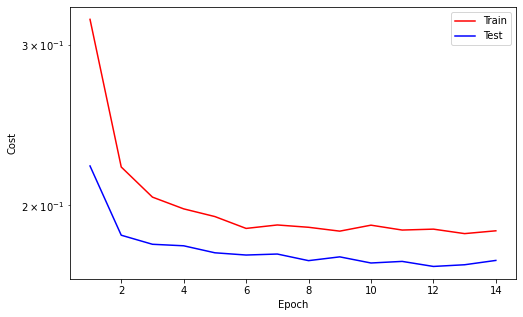

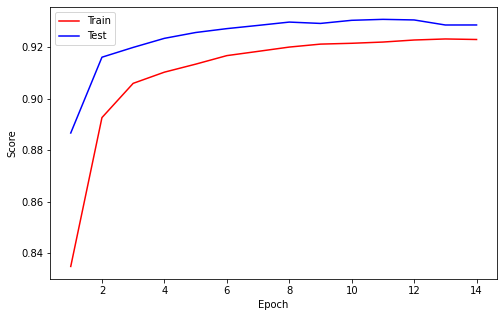

‚èπÔ∏è Training dihentikan oleh early stopping.

In [43]:
from train_and_evaluate import train_and_evaluate_multi_label

train_and_evaluate_multi_label(
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optim=optim,
    config=config,
    device=device,
    labels=labels,          
    callback=callback,
    dimension='3d'
)

# Evaluate

In [44]:
from evaluate import evaluate_multi_label

hsl = evaluate_multi_label(model, test_loader, target_cols,criterion, device, config.threshold, dimension='3d')

       üìä Evaluasi Model            üéØ Per-Label Accuracy    
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Metrik              ‚îÉ  Nilai ‚îÉ ‚îÉ     Label      ‚îÉ Akurasi ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ üîπ Overall Accuracy ‚îÇ 0.9308 ‚îÇ ‚îÇ y_gestational  ‚îÇ 0.9971  ‚îÇ
‚îÇ ‚úÖ Subset  Accuracy ‚îÇ 0.8249 ‚îÇ ‚îÇ y_no_diabetes  ‚îÇ 0.9220  ‚îÇ
‚îÇ üí• Loss (avg)       ‚îÇ 0.1736 ‚îÇ ‚îÇ y_pre-diabetes ‚îÇ 0.8280  ‚îÇ
‚îÇ üìâ Hamming Loss     ‚îÇ 0.0692 ‚îÇ ‚îÇ    y_type_1    ‚îÇ 0.9988  ‚îÇ
‚îÇ ‚öñÔ∏è  Micro F1-score   ‚îÇ 0.8266 ‚îÇ ‚îÇ    y_type_2    ‚îÇ 0.9079  ‚îÇ
‚îÇ üìà Macro F1-score   ‚îÇ 0.3410 ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [45]:
hsl['df'].head(100)

Target                   Prediksi  Benar (%)
0   [0.0, 1.0, 0.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]       60.0
1   [0.0, 0.0, 0.0, 0.0, 1.0]  [0.0, 0.0, 0.0, 0.0, 1.0]      100.0
2   [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0
3   [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0
4   [0.0, 0.0, 0.0, 0.0, 1.0]  [0.0, 0.0, 1.0, 0.0, 0.0]       60.0
..                        ...                        ...        ...
95  [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0
96  [0.0, 0.0, 0.0, 0.0, 1.0]  [0.0, 0.0, 0.0, 0.0, 1.0]      100.0
97  [0.0, 0.0, 0.0, 0.0, 1.0]  [0.0, 0.0, 0.0, 0.0, 1.0]      100.0
98  [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0
99  [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0

[100 rows x 3 columns]

# Pengaplikasian

In [46]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [47]:
import torch, json
from torch import optim, nn
from class_lib import MultiLabel3DClassifier
import joblib
import pandas as pd


# Load Config
config = torch.load(root_folder + "configs.pth", map_location="cpu", weights_only=False)
#config = torch.load(root_folder + "configs.pth", map_location="cpu")

#Load Weights
weights= torch.load(root_folder + "weights_best.pth", map_location="cpu")

#Load Label Mapping
with open(root_folder + "label_mappings.json", "r") as f:
    label_mapping = json.load(f)


model = MultiLabel3DClassifier(
    input_dim_1  = config.input_1_dim, 
    input_dim_2  = config.input_2_dim, 
    input_dim_3  = config.input_3_dim, 
    hidden_dims_1= config.hidden_1_dims,
    hidden_dims_2= config.hidden_2_dims,
    hidden_dims_3= config.hidden_3_dims,
    combined_dims= config.combine_dims,
    output_dim   = config.output_dim,
    dropout=config.dropout, 
    activation=config.activation
)
model.load_state_dict(weights)
model.eval() 

MultiLabel3DClassifier(
  (net1): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (net2): Sequential(
    (0): Linear(in_features=4, out_features=5, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=5, out_features=2, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
  )
  (net3): Sequential(
    (0): Linear(in_features=3, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=4, out_features=2, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
  )
  (net_combined): Sequential(
    (0): Linear(in_features=5, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=4, out_features=5, bias=True)
    (4): Sigmoid()
  )
)

In [48]:
from aplokator import MultiLabelPredictor
predictor = MultiLabelPredictor(
    model=model,
    config=config,
    label_mapping=label_mapping,
    scaler_folder=root_folder,
    dimension='3d'
)

HTML(value='\n        <style>\n        .minimal-container { background: #f8f9fa; padding: 12px; border-radius:‚Ä¶